# Simulation Open Loop 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
import package_LAB
from package_LAB import Display_Bode


## Parameters

In [2]:
TSim = 450
Ts = 0.1
MVPath = {0: 1, 239:0 , TSim: 0}
N = int(TSim/Ts) + 1
t = []
for i in range(N):
    t.append(i*Ts)


 # Real data

In [3]:
nameFile = 'OPL_Experimentation/Open_loop_experiment_on_MV_2023-03-14-09h30_pt_fct_50_delta_20.txt' 
    
titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)
t_r = data['t'].values - data['t'].values[0]
MV_r = data['MV'].values
PV_r = data['PV'].values
DV_r = data['DV'].values

(45.0, 55.0)

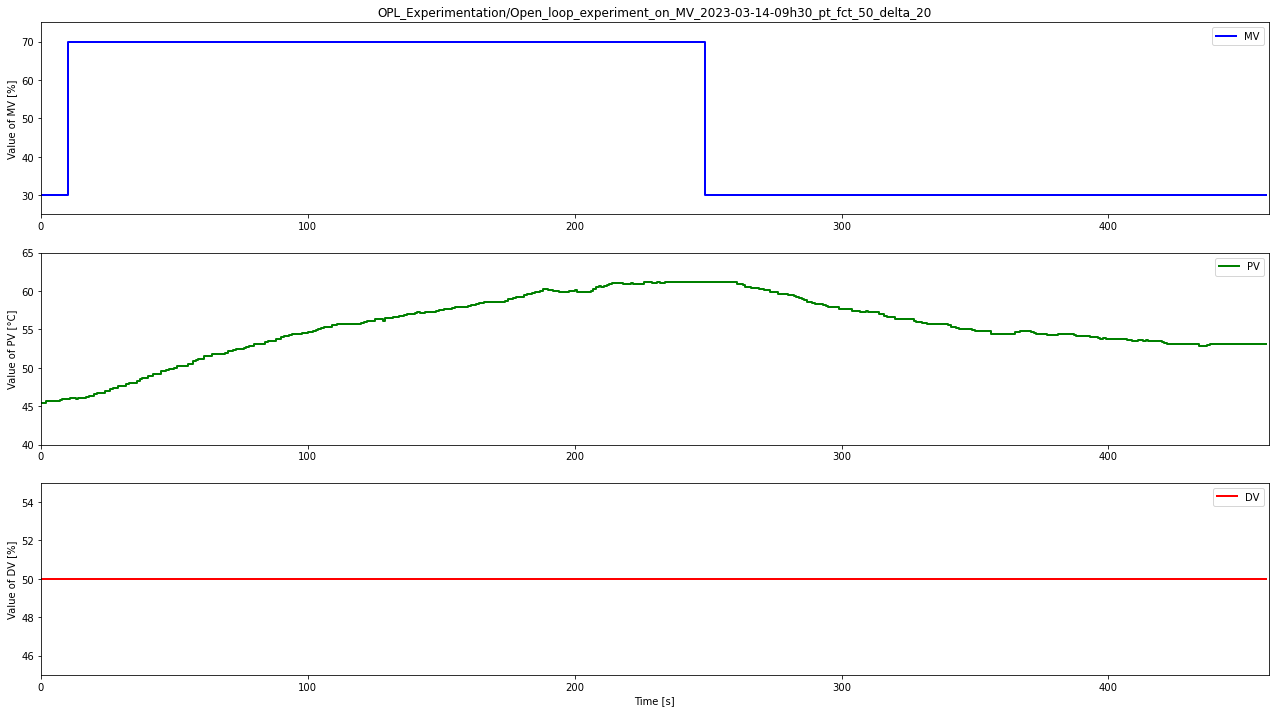

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t_r,MV_r)
l2.set_data(t_r,PV_r)
l3.set_data(t_r,DV_r)

ax1.set_xlim(0, t_r[-1]+1)
ax2.set_xlim(0, t_r[-1]+1)
ax3.set_xlim(0, t_r[-1]+1)

ax1.set_ylim(myRound(np.min(MV_r),5)-5, myRound(np.max(MV_r),5)+5)
ax2.set_ylim(myRound(np.min(PV_r),5)-5, myRound(np.max(PV_r),5)+5)
ax3.set_ylim(myRound(np.min(DV_r),5)-5, myRound(np.max(DV_r),5)+5)

In [5]:

tstep = np.argwhere(np.diff(MV_r) != 0)
tstep = tstep[0][0]
tm = t_r[tstep:]
tm = tm - tm[0]    
MVstep = MV_r[tstep + 1] - MV_r[tstep]
MVm = MV_r[tstep:]
PVm = PV_r[tstep:]
PVm = (PVm - PVm[0])/MVstep
MVm = (MVm - MVm[0])/MVstep    

(0.0, 451.0)

<Figure size 1584x1584 with 0 Axes>

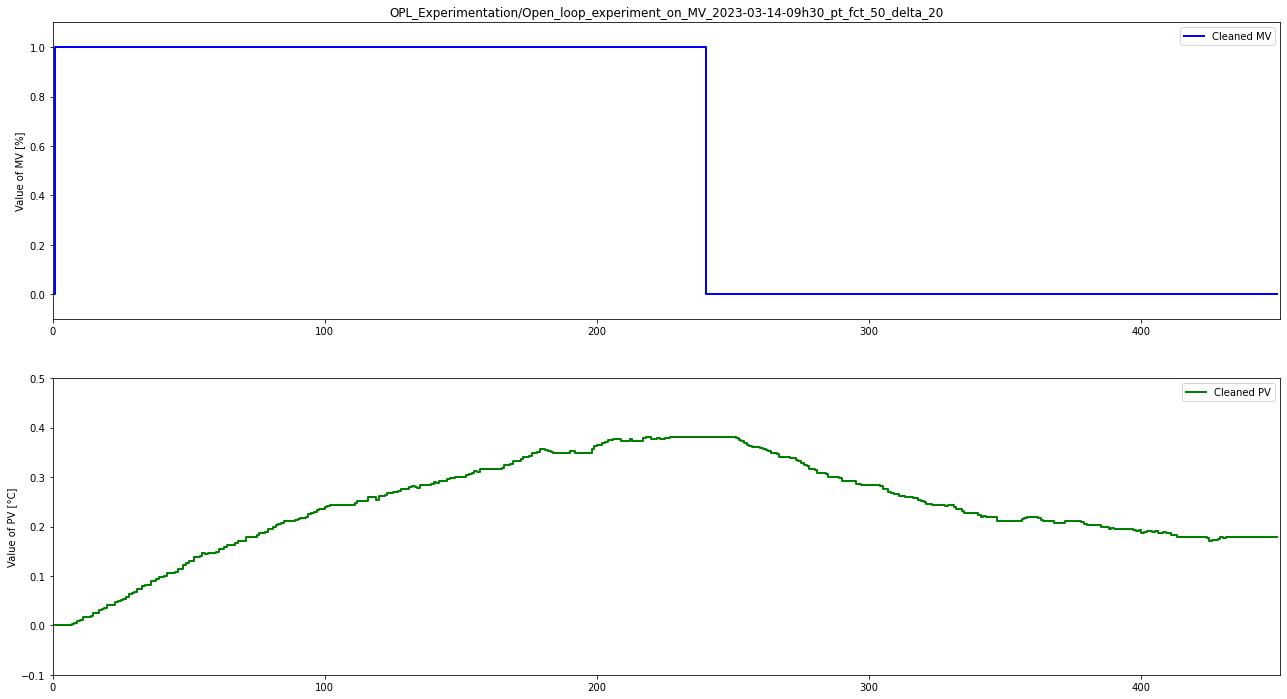

In [6]:


plt.figure(figsize = (22,22))

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)


l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')
l1.set_data(tm,MVm)
ax1.set_ylim(myRound(np.min(MVm),1)-0.1, myRound(np.max(MVm),1)+0.1)    
 

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='Cleaned PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)



# Graphical methods
## Values 



In [7]:
import math 
t1= 42
t2=61

Tg_graph= 139
Tu_graph= 5

a_graph=0.09
Kp_graph= 0.38

e= np.exp(1) # exponetiel

s = np.linspace(0, 400, 1000)

## Broida model

First Order plus delay

## Broida 1

In [8]:
T_brd1=Tg_graph 
theta_brd1 = Tu_graph
print("T_brd1= ",T_brd1)
print("theta_brd1 = ",theta_brd1)

T_brd1=  139
theta_brd1 =  5


(0.0, 450.0)

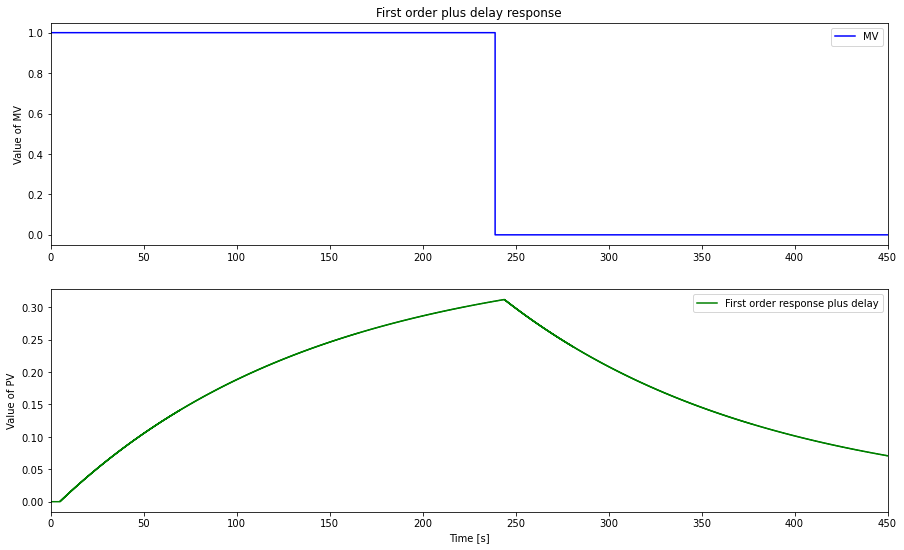

In [9]:
t = []
MV = []



# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp_graph,T_brd1,theta_brd1,Ts)
PV_broida1=PV    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

## Broida 2:

In [10]:
T_brd2= 5.5*(t2-t1)
theta_brd2=(2.8*t1)-(1.8*t2)
print ("T_brd2: ", T_brd2)
print ("theta_brd2: ", theta_brd2)

T_brd2:  104.5
theta_brd2:  7.799999999999997


(0.0, 450.0)

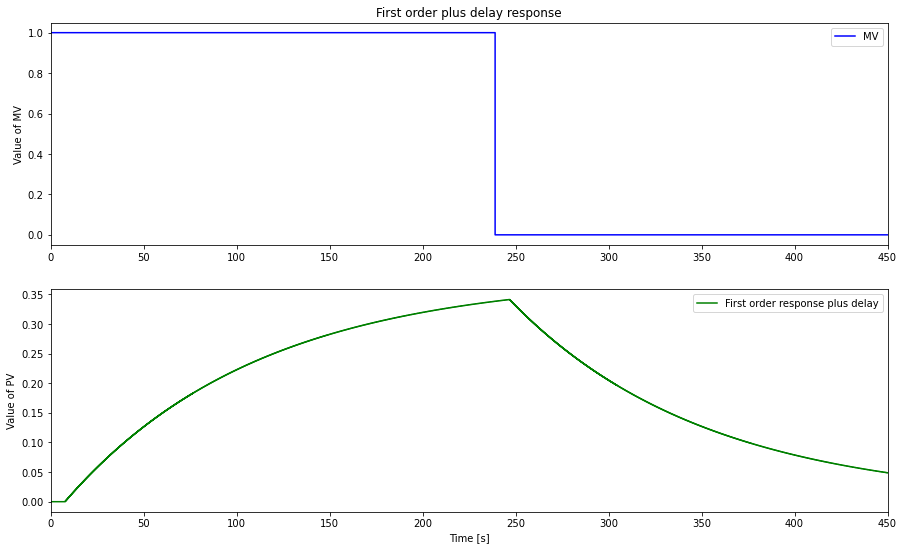

In [11]:
t = []
MV = []

# Parameters
Kp = Kp_graph
T = T_brd2
theta = theta_brd2

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
PV_broida2=PV    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])   

## van der Grinten model
Second order plus delay


In [12]:
T1_vdg= Tg_graph*((3*a_graph*e)-1)/(1+(a_graph*e))
T2_vdg= Tg_graph*(1-(a_graph*e))/(1+(a_graph*e))

theta_graph_vdg = Tu_graph-((T1_vdg*T2_vdg)/(T1_vdg+3*T2_vdg))

print ("theta vdg:",theta_graph_vdg, "\nT1 vdg: ",T1_vdg,"\nT2 vdg: ", T2_vdg)



theta vdg: 16.2221492501655 
T1 vdg:  -29.713590739131522 
T2 vdg:  84.35679536956576


In [13]:
if T1_vdg<0 or T2_vdg<0:
    print ('T1 or T2 is a negative value Van der Grinten model is not suitable for the results.')
else:
    t = []
    MV = []
    
    # Parameters
    Kp = Kp_graph
    theta = theta_graph_vdg
    T1 = T1_vdg
    T2 = T2_vdg
    
    # MV is created from MVPath
    for i in range(0,N):
        t.append(i*Ts)
        SelectPath_RT(MVPath,t,MV)
        
    PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
    
    PVSOPDT_van_der_grinten=PVSOPDT
    
    plt.figure(figsize = (15,9))
    
    plt.subplot(2,1,1)
    plt.step(t,MV,'b-',label='MV',where='post')
    plt.ylabel('Value of MV')
    plt.title('Second order plus delay response')
    plt.legend(loc='best')
    plt.xlim([0, TSim])
    
    plt.subplot(2,1,2)
    plt.step(t,PVSOPDT,'g-',label='Van der Grinten, Second order response plus delay',where='post')
    plt.ylabel('Value of PV')
    plt.xlabel('Time [s]')
    plt.legend(loc='best')
    plt.xlim([0, TSim])    

T1 or T2 is a negative value Van der Grinten model is not suitable for the results.


## Strejc model

PS(s) = KP e^−θs/(T s + 1)^n
n order with delay

In [14]:
print ("Tu/Tg : ", Tu_graph/Tg_graph)

Tu/Tg :  0.03597122302158273


In [15]:
# Tu/Tg = 0.036 so the oder of the model is the first order model
n=1
bn= 1.00 #
an= 0.00

T_strecj=Tg_graph/bn
T_uth= an*Tg_graph

theta_strecj = Tu_graph-T_uth

print ("T strecj : ",T_strecj,"\nT uth : ",T_uth, "\ntheta strecj : ", theta_strecj )
PS = (Kp*np.exp(-theta*s))/((T*s+1)**n)





T strecj :  139.0 
T uth :  0.0 
theta strecj :  5.0


(0.0, 450.0)

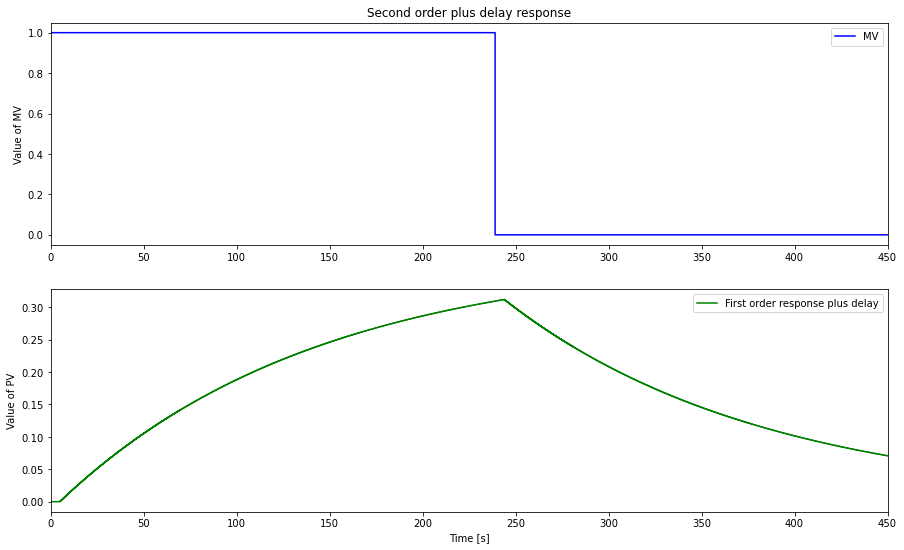

In [16]:
t = []
MV = []

# Parameters
Kp = Kp_graph
theta = theta_strecj
T1 = T_strecj
T2 = T_strecj

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)

if n==1:    
    PVFOPDT = FOPDT(MV,Kp,T1,theta,Ts)
    graph_strecj= PVFOPDT
elif n==2:
    PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
    graph_strecj= PVSOPDT

plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
if n==2:
    plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
elif n==1:
    plt.step(t,PVFOPDT,'g-',label='First order response plus delay',where='post')

plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

# Numerical methods :

Second order plus delay

(0.0, 450.0)

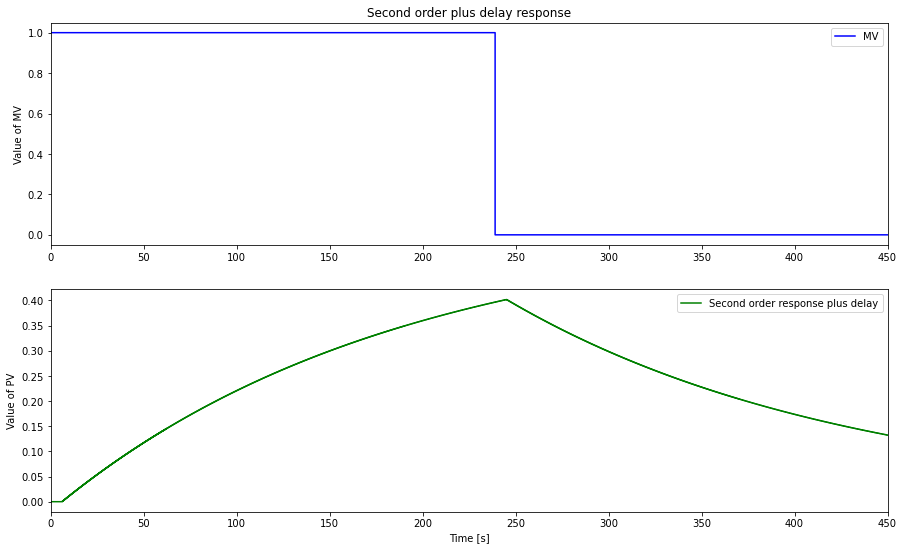

In [17]:
t = []
MV = []

# Parameters
Kp = 0.5533580402010314
theta = 6.193369063828597
T1 = 184.5046840951011
T2 = 1.7824360575108777e-07

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    

PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
PVSOPDT_Num=PVSOPDT

plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

First order plus delay

(0.0, 450.0)

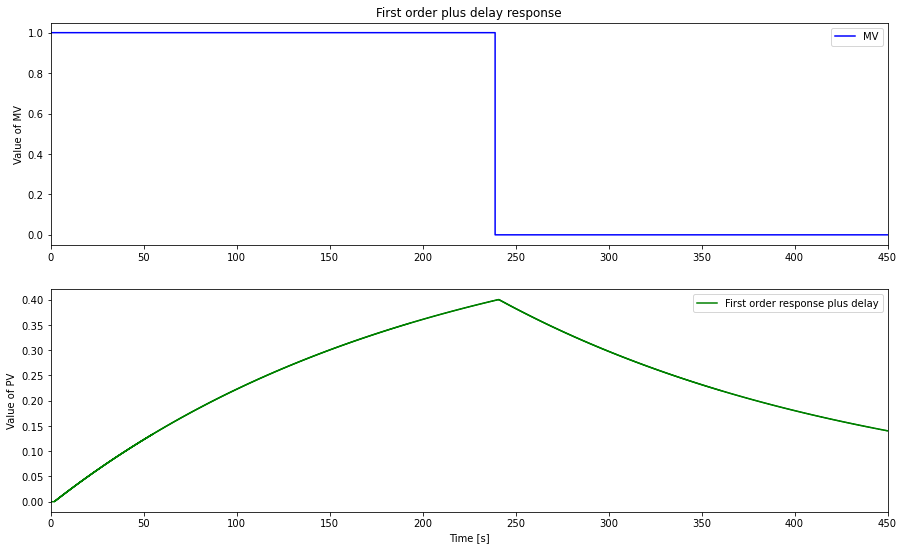

In [18]:
t = []
MV = []

# Parameters
Kp = 0.5735328853119709
T = 199.41648730815996
theta = 1.9282492101435196

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
PVFOPDT_Num=PV

plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

# Graph

Van der Grinten model does not exist


(0.0, 450.0)

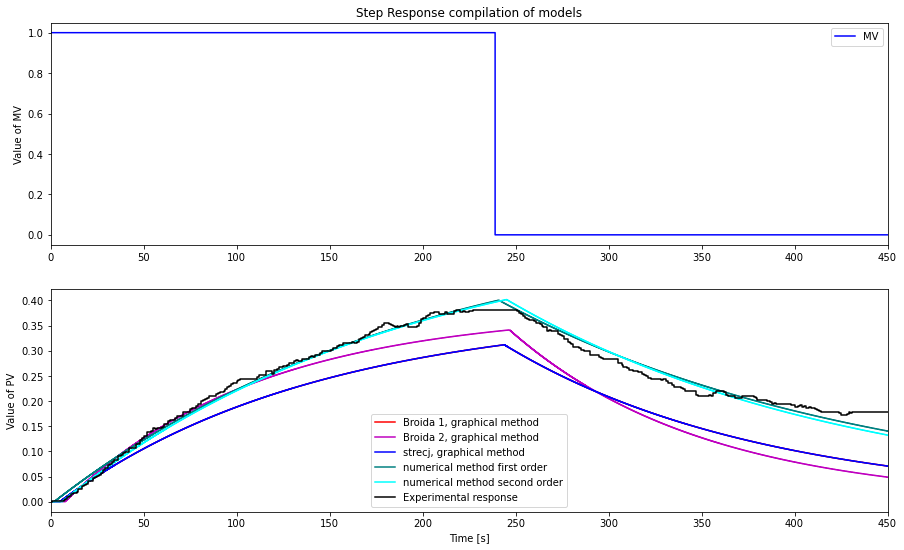

In [19]:
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Step Response compilation of models')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_broida1,'r-',label='Broida 1, graphical method',where='post')
plt.step(t,PV_broida2,'m-',label='Broida 2, graphical method',where='post')
try :
    plt.step(t,PVSOPDT_van_der_grinten,'gold',label='van der Grinten, graphical method',where='post')
except :
    print('Van der Grinten model does not exist')
plt.step(t,graph_strecj,'b-',label='strecj, graphical method',where='post')
plt.step(t,PVFOPDT_Num,'teal',label='numerical method first order',where='post')
plt.step(t,PVSOPDT_Num,'cyan',label='numerical method second order',where='post')
plt.step(tm,PVm,'k-',label='Experimental response',where='post')


plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

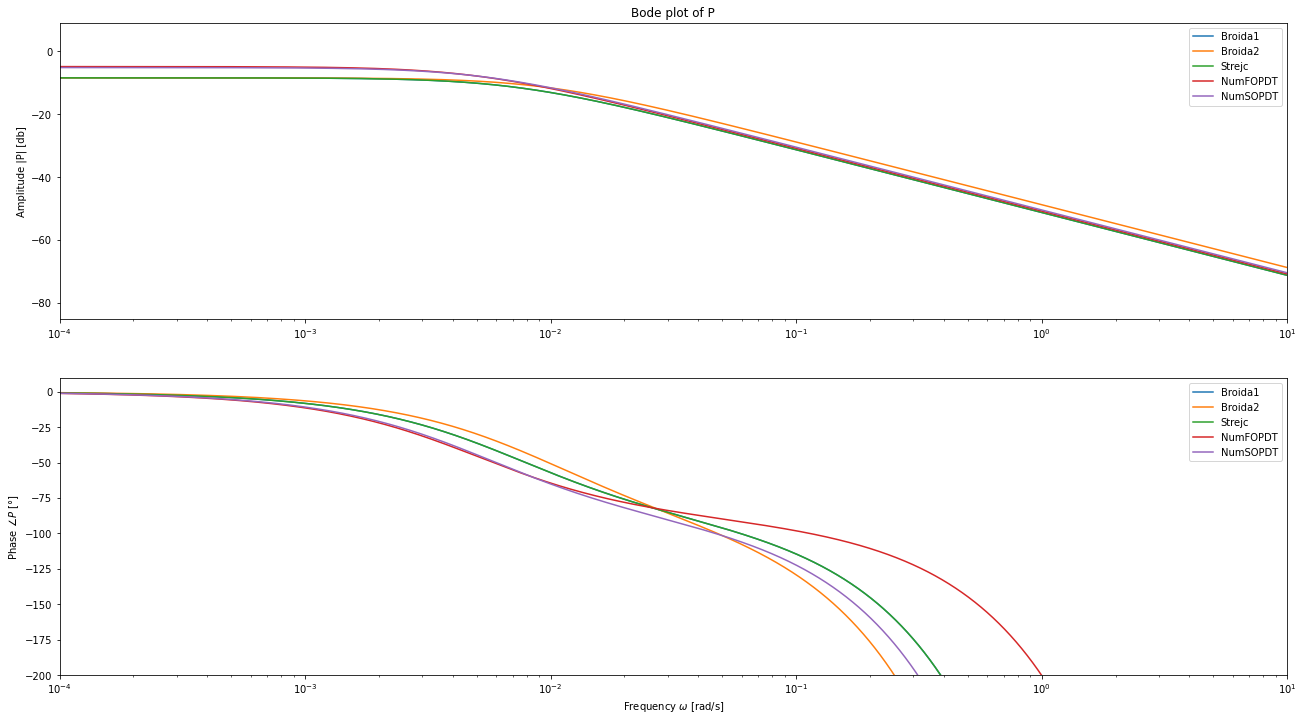

In [20]:
Broida1 = Process({}) 
Broida2 = Process({})
Strejc = Process({})
NumFOPDT = Process({})
NumSOPDT = Process({})

# Parameters for input-output dynamics P(s)


Broida1.parameters['Kp'] = 0.38
Broida1.parameters['Tlag1'] = 139
Broida1.parameters['theta'] = 5

Broida2.parameters['Kp'] = 0.38
Broida2.parameters['Tlag1'] = 104.5
Broida2.parameters['theta'] = 7.799999999999997

Strejc.parameters['Kp'] = 0.38
Strejc.parameters['Tlag1'] = 139
Strejc.parameters['theta'] = 5

NumFOPDT.parameters['Kp'] = 0.57353289
NumFOPDT.parameters['Tlag1'] = 199.416487
NumFOPDT.parameters['theta'] =1.92824921

NumSOPDT.parameters['Kp'] = 0.55335804
NumSOPDT.parameters['Tlag1'] = 184.504684
NumSOPDT.parameters['Tlag2']  = 0.000000178
NumSOPDT.parameters['theta'] = 6.19336906

omega = np.logspace(-4, 1, 10000)

Ps_Broida1=Bode(Broida1,omega,False)
Ps_Broida2=Bode(Broida2,omega,False)
Ps_Strejc=Bode(Strejc,omega,False)
Ps_NumFOPDT=Bode(NumFOPDT,omega,False)
Ps_NumSOPDT=Bode(NumSOPDT,omega,False)

Display_Bode(Ps_Broida1,Ps_Broida2,Ps_Strejc,Ps_NumFOPDT,Ps_NumSOPDT,omega)


## D(s) identification 

In [21]:
#Parameters
# First order plus delay
Kd_First_Order = 0.47934693
Td_First_Order = 183.862815
thetad_First_Order = 18.3877017

# Second order plus delay
Kd_Second_Order = 0.47236627
T1d_Second_Order = 172.259419
T2d_Second_Order = 22.1508609
thetad_Second_Order = 0.53371654




### Real data DV

In [22]:
TSim = 600
Ts = 0.1
N = int(TSim/Ts) + 1
DVPath = {0: 1, 387:0 , TSim: 0}
t = []
for i in range(N):
    t.append(i*Ts)

In [23]:
nameFile = 'OPL_Experimentation/Open_loop_experiment_on_DV_2023-03-14-17h52_pt_fct_50_delta_20.txt' 
    
titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)
t_r = data['t'].values - data['t'].values[0]
MV_r = data['MV'].values
PV_r = data['PV'].values
DV_r = data['DV'].values


(25.0, 75.0)

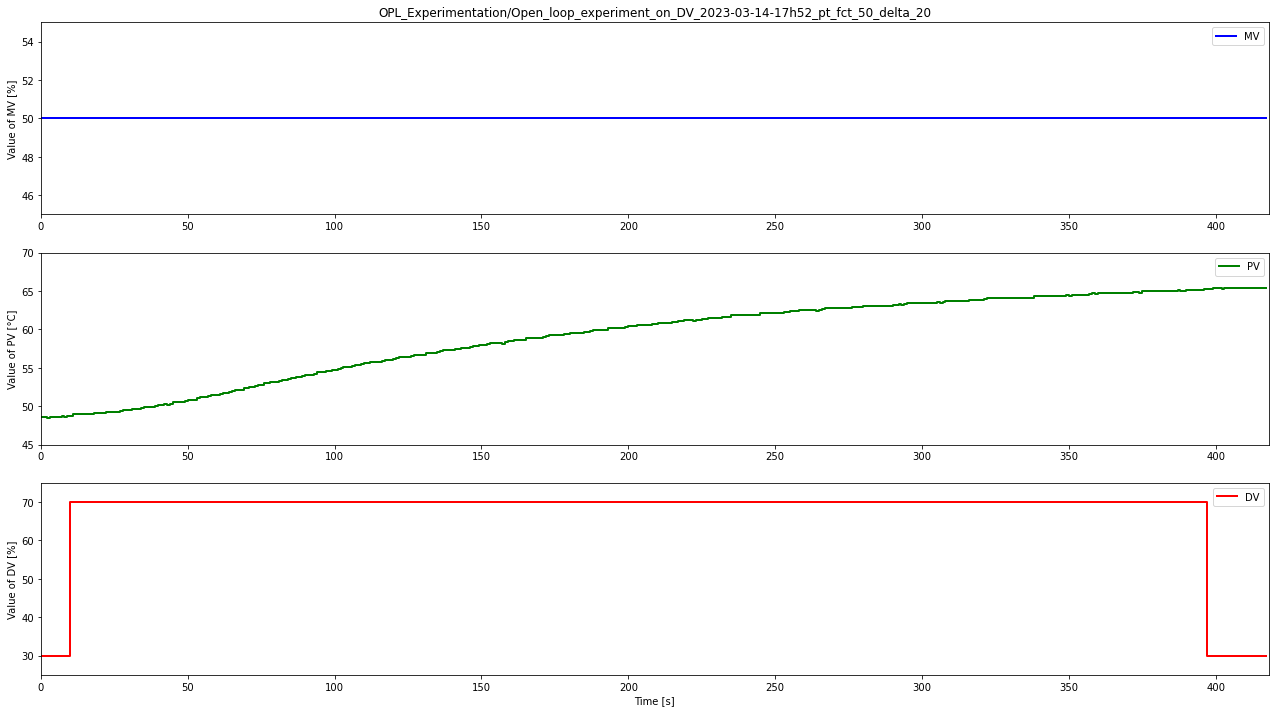

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t_r,MV_r)
l2.set_data(t_r,PV_r)
l3.set_data(t_r,DV_r)

ax1.set_xlim(0, t_r[-1]+1)
ax2.set_xlim(0, t_r[-1]+1)
ax3.set_xlim(0, t_r[-1]+1)

ax1.set_ylim(myRound(np.min(MV_r),5)-5, myRound(np.max(MV_r),5)+5)
ax2.set_ylim(myRound(np.min(PV_r),5)-5, myRound(np.max(PV_r),5)+5)
ax3.set_ylim(myRound(np.min(DV_r),5)-5, myRound(np.max(DV_r),5)+5)

In [25]:
tstep = np.argwhere(np.diff(DV_r) != 0)
tstep = tstep[0][0]
tm = t_r[tstep:]
tm = tm - tm[0]    
DVstep = DV_r[tstep + 1] - DV_r[tstep]
DVm = DV_r[tstep:]
PVm = PV_r[tstep:]
PVm = (PVm - PVm[0])/DVstep
DVm = (DVm - DVm[0])/DVstep    



(0.0, 601.0)

<Figure size 1584x1584 with 0 Axes>

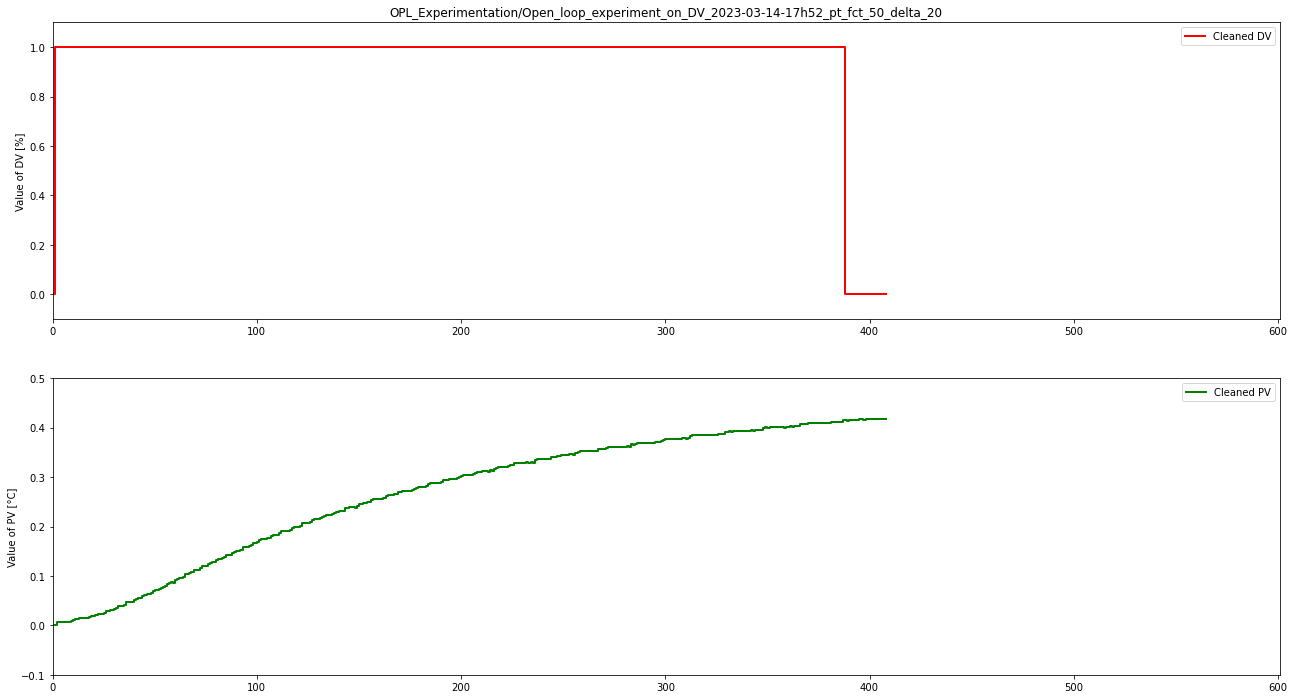

In [26]:
plt.figure(figsize = (22,22))

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)


l1, = ax1.step([0,1],[0,100],'r-',linewidth=2,label='Cleaned DV',where='post')
ax1.set_ylabel('Value of DV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')
l1.set_data(tm,DVm)
ax1.set_ylim(myRound(np.min(DVm),1)-0.1, myRound(np.max(DVm),1)+0.1)    
 

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='Cleaned PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

## First order plus delay for DV

In [27]:
t = []
DV = []


# frist order plus delay
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(DVPath,t,DV)
    
PVFOPDT_DV_Num = FOPDT(DV,Kd_First_Order,Td_First_Order,thetad_First_Order,Ts)


# second order plus delay


PVSOPDT_DV_Num = SOPDT(DV,Kd_Second_Order,T1d_Second_Order,T2d_Second_Order,thetad_Second_Order,Ts)



(0.0, 600.0)

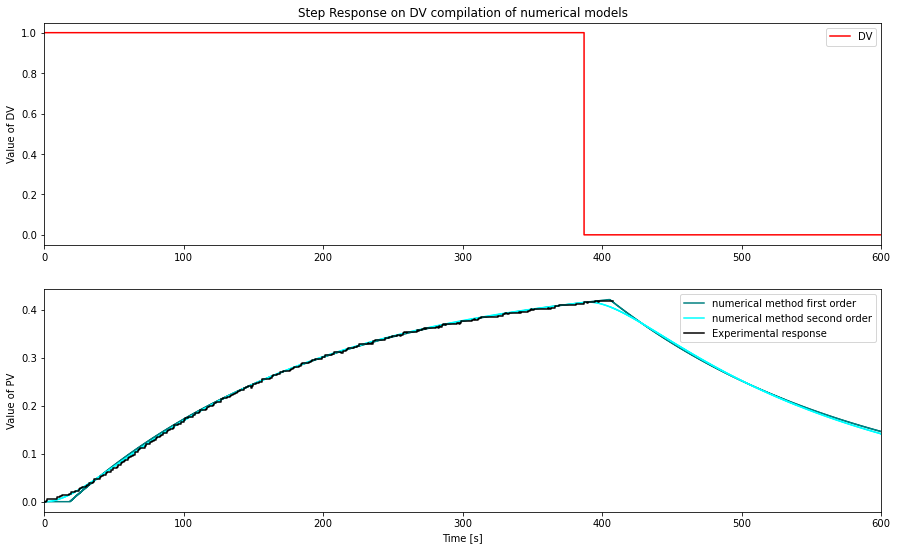

In [28]:
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,DV,'r-',label='DV',where='post')
plt.ylabel('Value of DV')
plt.title('Step Response on DV compilation of numerical models')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)

plt.step(t,PVFOPDT_DV_Num,'teal',label='numerical method first order',where='post')
plt.step(t,PVSOPDT_DV_Num,'cyan',label='numerical method second order',where='post')
plt.step(tm,PVm,'k-',label='Experimental response',where='post')


plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])   